## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Checking the number of mice.

mouse_metadata["Mouse ID"].count()

249

In [2]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset

df = mouse_metadata.merge(study_results, on ="Mouse ID", how = "inner")

# Display the data table for preview

pd.set_option('display.max_columns',None)
print(df)

 

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mask = df.duplicated( subset=["Mouse ID", "Timepoint"])
df.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

df.loc[df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# drop the whole mouse since we don't know the truth data record to keep and don't want to bias

df_cleandata=df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)

df_cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
df_cleandata["Mouse ID"].count()

1880

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_groups = df_cleandata.groupby("Drug Regimen")

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
var_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

sumTable = pd.DataFrame()
sumTable["Mean Tumor Volume"] = avg_tumor
sumTable["Median Tumor Volume"] = med_tumor
sumTable["Variance Tumor Volume"] = var_tumor
sumTable["Standard Deviation Tumor Volume"] = std_tumor
sumTable["SEM Tumor Volume"] = sem_tumor

sumTable


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_groups.agg({"Tumor Volume (mm3)" :["mean","median","var","std","sem"]})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

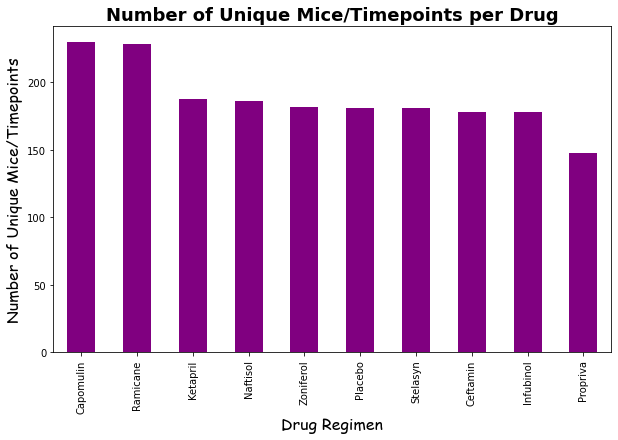

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


x = drug_groups.size().index
y = drug_groups.size().values

plt.figure(figsize=(10,6))


df_cleandata["Drug Regimen"].value_counts().plot(kind = "bar", color="purple")

plt.xlabel("Drug Regimen",fontsize=16, fontname="Comic Sans MS")
plt.ylabel("Number of Unique Mice/Timepoints",fontsize=16, fontname="Comic Sans MS")
plt.title("Number of Unique Mice/Timepoints per Drug",fontsize=18, fontweight="bold")

plt.show()

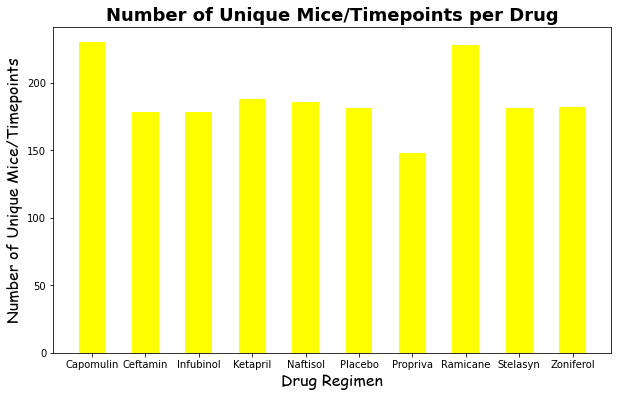

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x = drug_groups.size().index
y = drug_groups.size().values

plt.figure(figsize=(10,6))
plt.bar(x,y,linewidth=8.0, color="yellow",width = 0.5)

plt.xlabel("Drug Regimen",fontsize=16, fontname="Comic Sans MS")
plt.ylabel("Number of Unique Mice/Timepoints",fontsize=16, fontname="Comic Sans MS")
plt.title("Number of Unique Mice/Timepoints per Drug",fontsize=18, fontweight="bold")

plt.show()



In [14]:
df_cleandata.groupby("Sex")["Mouse ID"].nunique()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

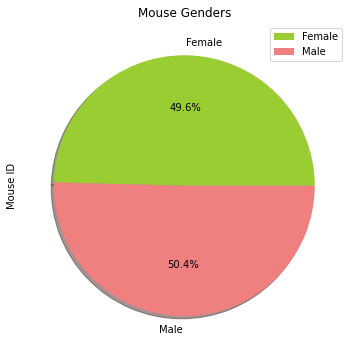

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_cleandata.groupby("Sex")["Mouse ID"].nunique().plot(kind="pie",autopct='%1.1f%%',figsize=(11, 6),shadow=True,colors = ["yellowgreen", "lightcoral"])
plt.title("Mouse Genders")
plt.legend()
plt.show()



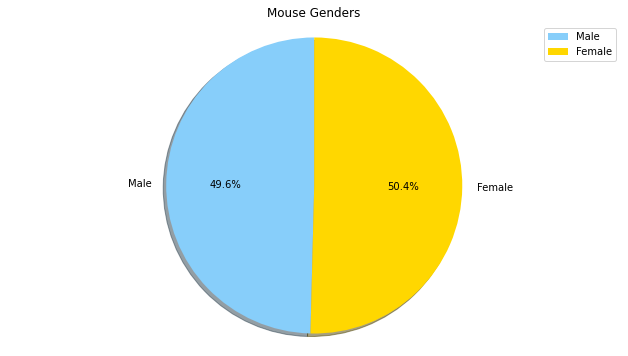

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df_sex = df_cleandata.groupby("Sex")["Mouse ID"].nunique()
plt.figure(figsize=(11, 6))
labels = ["Male", "Female"]
colors = ["lightskyblue", "gold"]

plt.pie(df_sex, labels=labels ,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title("Mouse Genders")
plt.legend()
plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_final=df_cleandata.loc[df_cleandata["Drug Regimen"].isin(regimens)].reset_index(drop=True)
maxMousse = df_final.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_regimen = df_final.merge(maxMousse, on=["Mouse ID", "Timepoint"])
df_regimen
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)

Capomulin

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile o

findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


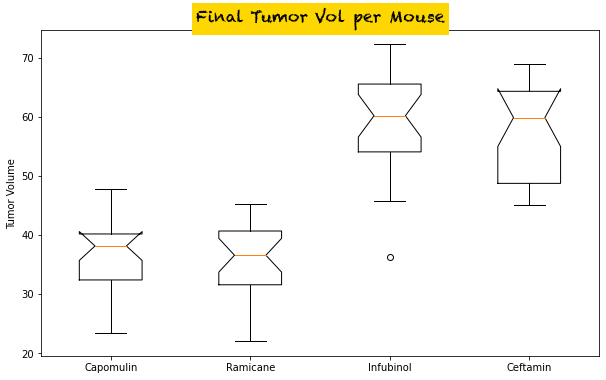

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], notch=True)

plt.title("Final Tumor Vol per Mouse",fontsize=16, fontname="Chalkduster",fontweight = "bold",backgroundcolor = "gold")
plt.ylabel("Tumor Volume",fontname="Lucida Calligraphy")

plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = df_cleandata.loc[df_cleandata['Mouse ID'] == "x401"].reset_index(drop=True)
mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,x401,Capomulin,Female,16,15,0,45.000000,0
1,x401,Capomulin,Female,16,15,5,45.473753,0
2,x401,Capomulin,Female,16,15,10,39.113891,0
3,x401,Capomulin,Female,16,15,15,39.776250,0
4,x401,Capomulin,Female,16,15,20,36.065835,0
5,x401,Capomulin,Female,16,15,25,36.617120,0
6,x401,Capomulin,Female,16,15,30,32.915292,0
7,x401,Capomulin,Female,16,15,35,30.206825,0
8,x401,Capomulin,Female,16,15,40,28.167397,0
9,x401,Capomulin,Female,16,15,45,28.484033,0


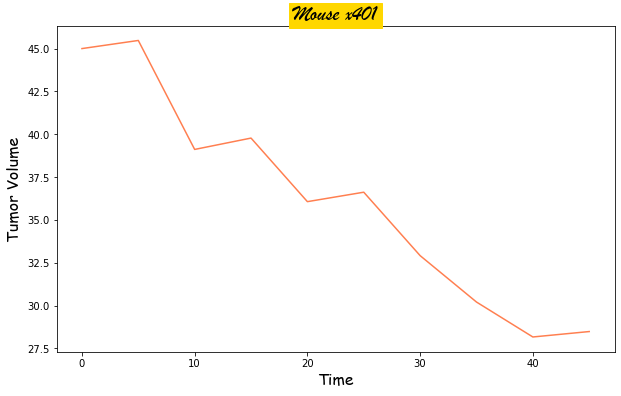

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="coral")

plt.title("Mouse x401", fontsize=22, fontweight="bold", fontname="Brush Script MT",backgroundcolor = "gold")
plt.xlabel('Time', fontsize=16, fontname="Comic Sans MS")
plt.ylabel("Tumor Volume", fontsize=16, fontname="Comic Sans MS")

plt.show()


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weightTumor_df = df_cleandata.loc[df_cleandata["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
weightTumor_df.corr()

<ipython-input-22-e5e3f3c359f5>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weightTumor_df = df_cleandata.loc[df_cleandata["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [23]:
# for linear regression modelling
sts.pearsonr(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"])

(0.8419363424694717, 1.322572243471279e-07)

In [24]:
feature = weightTumor_df["Weight (g)"]
target = weightTumor_df["Tumor Volume (mm3)"]

findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


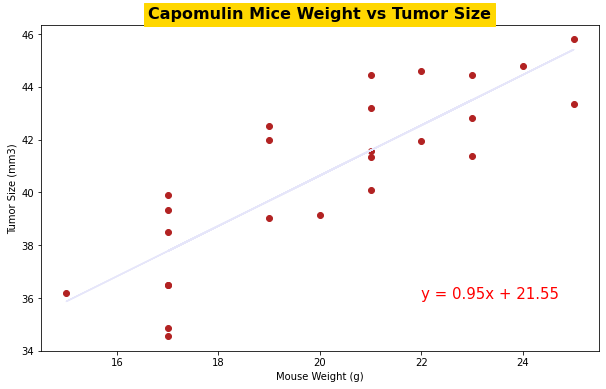

In [25]:
# LINREGRESS

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=16, fontweight="bold", fontname = "Lucida Calligraphy",backgroundcolor = "gold")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="lavender")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()


## We can see the study result shows that Capomulin and Ramicane are two most promising drug regimens among all as they both have lower tumor volume results on mouse with lower SD and SEM as well.